In [1]:
import os
import cv2
import h5py
import json
import keras
import random 
import imageio
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Data = pd.read_csv('/content/drive/My Drive/donorschoose/Projects.csv') 
Data.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


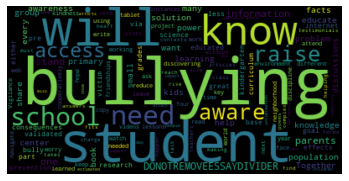

In [5]:
text = Data["Project Essay"][0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

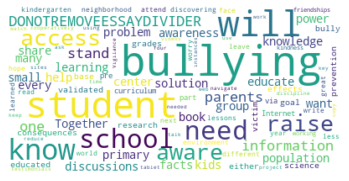

In [6]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
Data=Data.loc[:,["Project Subject Category Tree","Project Title","Project Essay"]]
Data


,Project Subject Category Tree,Project Title,Project Essay
0,Applied Learning,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...
1,"Applied Learning, Literacy & Language",Learning in Color!,"Help us have a fun, interactive listening cent..."
2,Literacy & Language,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...
3,Literacy & Language,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...
4,Special Needs,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s..."
...,...,...,...
1110012,Music & The Arts,Screen Printing 101,Most of the scholars had no idea that they wou...
1110013,"Literacy & Language, Math & Science",Flexible Seating for Super Second Graders!,My students are super second graders!!! ...
1110014,"Literacy & Language, Music & The Arts",Growing Artists!,"I teach at a Title I school, and 76% of studen..."
1110015,Literacy & Language,TIME For Kids!,I teach at a Title I school for a district tha...


1 / 52 Applied Learning
   Project Subject Category Tree  ...                                      Project Essay
0               Applied Learning  ...  Did you know that 1-7 students in grades K-12 ...
6               Applied Learning  ...  Travel and hands on experiences outside the cl...
10              Applied Learning  ...  Teasing is part of being a kid, right? Wrong! ...
52              Applied Learning  ...  In our fast paced world, students are being su...
58              Applied Learning  ...  Students' play takes them to a higher social f...

[5 rows x 3 columns]
There are 76255020 words in the combination of all review.


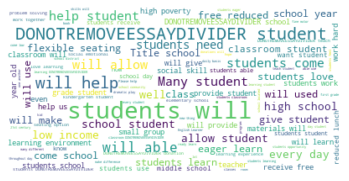

2 / 52 Applied Learning, Literacy & Language
             Project Subject Category Tree  ...                                      Project Essay
1    Applied Learning, Literacy & Language  ...  Help us have a fun, interactive listening cent...
12   Applied Learning, Literacy & Language  ...  Early exposure to books can be an important co...
25   Applied Learning, Literacy & Language  ...  Do you remember your favorite classroom from e...
47   Applied Learning, Literacy & Language  ...  My Computer Skills/Applications class would us...
111  Applied Learning, Literacy & Language  ...  Bullying is affecting many children emotionall...

[5 rows x 3 columns]
There are 54792047 words in the combination of all review.


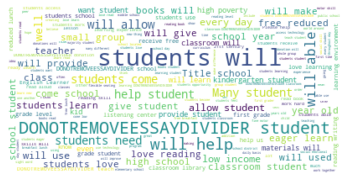

3 / 52 Literacy & Language
  Project Subject Category Tree  ...                                      Project Essay
2           Literacy & Language  ...  Visiting or moving to a new place can be very ...
3           Literacy & Language  ...  Students at our school are still working hard ...
7           Literacy & Language  ...  Current events, news, and non-fiction articles...
8           Literacy & Language  ...  Grammar can be tricky!  My students face many ...
9           Literacy & Language  ...  Do you remember when your parents read bedtime...

[5 rows x 3 columns]
There are 419383108 words in the combination of all review.


In [ ]:
count=0
for i in Data["Project Subject Category Tree"].unique():
    count+=1
    print(count,"/",52,i)
    pdata=Data.loc[Data["Project Subject Category Tree"]==i]
    print(pdata.head())
    text = " ".join(str(review) for review in pdata["Project Essay"])
    print ("There are {} words in the combination of all review.".format(len(text)))

    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(list([str(p) for p in Data["Project Subject Category Tree"].unique()])+["project", "Literacy", "Language", "flavor", "flavors"])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [16]:
list(Data["Project Subject Category Tree"].unique())

['Applied Learning',
 'Applied Learning, Literacy & Language',
 'Literacy & Language',
 'Special Needs',
 'Literacy & Language, History & Civics',
 'Math & Science',
 'History & Civics, Math & Science',
 'Literacy & Language, Special Needs',
 'Applied Learning, Special Needs',
 'Health & Sports, Special Needs',
 'Math & Science, Literacy & Language',
 'Literacy & Language, Math & Science',
 'Literacy & Language, Music & The Arts',
 'Math & Science, Special Needs',
 'Health & Sports',
 'Music & The Arts',
 'Math & Science, Applied Learning',
 'Literacy & Language, Applied Learning',
 'Applied Learning, Music & The Arts',
 'History & Civics, Literacy & Language',
 'Applied Learning, Math & Science',
 'Health & Sports, Math & Science',
 'Applied Learning, Health & Sports',
 'History & Civics',
 'History & Civics, Music & The Arts',
 'Math & Science, History & Civics',
 'Math & Science, Music & The Arts',
 'Special Needs, Music & The Arts',
 'History & Civics, Applied Learning',
 'History 

In [9]:
pdata=Data.loc[Data["Project Subject Category Tree"]=="Applied Learning"]
text = " ".join(str(review) for review in Data["Project Subject Category Tree"])
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["project", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 27738820 words in the combination of all review.


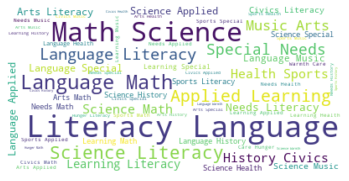

In [10]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["project", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()